# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 8.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T (Xw - y)\
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [43]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [45]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [46]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [47]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124777430/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124777489/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124777521/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124777540/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124777698/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [48]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [49]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [50]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

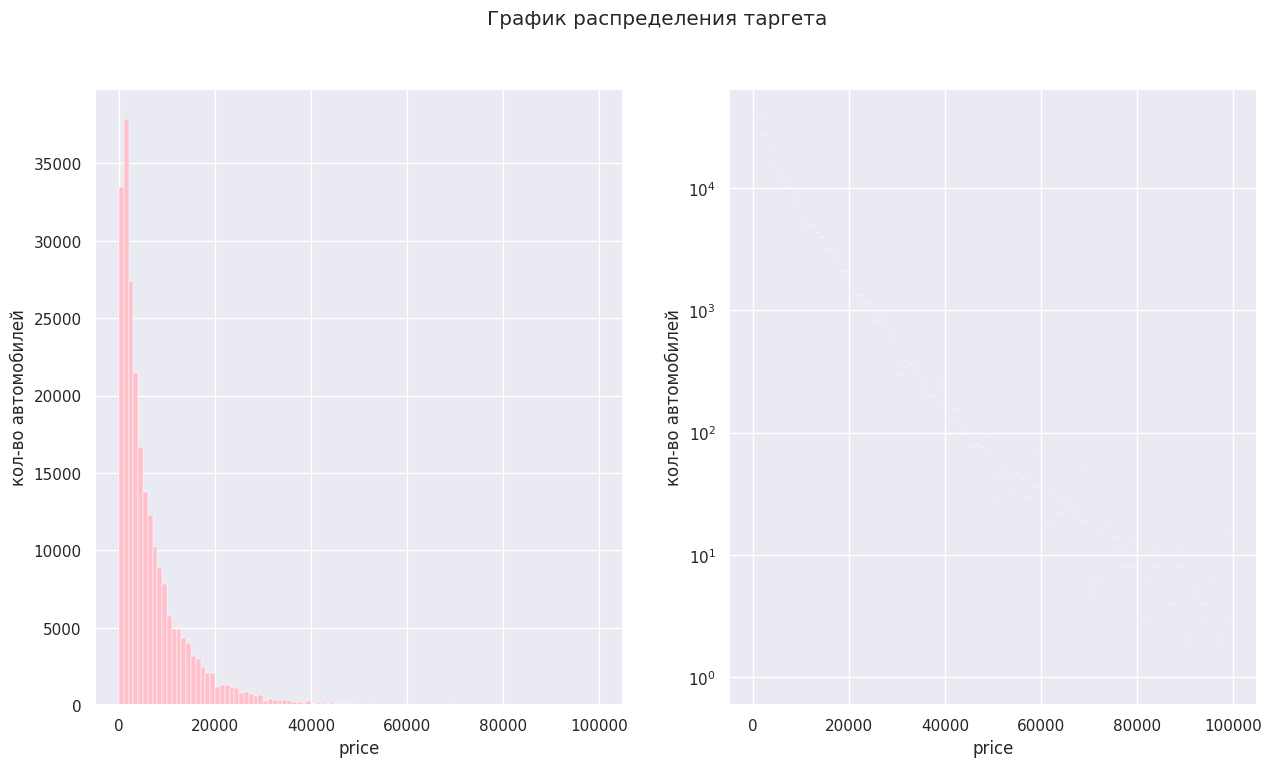

In [51]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage']

# YOUR CODE (EDA):
fig , ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 8))
sns.histplot(data = data,
             x = 'price',
             bins = 100,
             color = 'pink',
             alpha = 1,
             ax = ax[0])
sec = sns.histplot(data = data,
                   x = 'price',
                   bins = 100,
                   color = 'pink',
                   alpha = 1,
                   log_scale = (False, True),
                   ax = ax[1])

ax[0].set_xlabel("price")
ax[0].set_ylabel("кол-во автомобилей")
ax[1].set_xlabel("price")
ax[1].set_ylabel("кол-во автомобилей")
fig.suptitle("График распределения таргета")
plt.show()

In [52]:
data.drop(data[data.price > 65000].index, inplace=True)

In [53]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,240842.000000,240842.00000,240842.000000,240842.000000
mean,130.954377,123863.69487,144.802468,6786.062402
std,59.934755,39738.67511,72.930853,7561.887389
min,51.000000,5000.00000,1.000000,1.000000
25%,90.000000,100000.00000,92.000000,1750.000000
50%,120.000000,150000.00000,140.000000,4100.000000
75%,160.000000,150000.00000,192.000000,8990.000000
max,589.000000,150000.00000,600.000000,65000.000000


In [54]:
data.dtypes

,0
brand,object
model,object
vehicleType,object
gearbox,object
fuelType,object
notRepairedDamage,object
powerPS,int64
kilometer,int64
autoAgeMonths,int64
price,int64


In [55]:
# Оценим корреляции. Довольно сильная корреляция между числовыми признаками и таргетом (ценой).
data_eda = data.drop(['price'], axis=1)
numeric_cols = data_eda.select_dtypes([np.number])
numeric_features = numeric_cols.columns

data_eda[numeric_features].corrwith(data.price).sort_values(ascending=False)

,0
powerPS,0.586768
kilometer,-0.481654
autoAgeMonths,-0.535802


In [56]:
# Верну цену в датафрейм, тк теперь она нужна вместе с возрастом авто

data_eda = pd.DataFrame(data.value_counts(subset = ['price', 'autoAgeMonths'])).reset_index()
data_eda.autoAgeMonths = round(data_eda.autoAgeMonths / 10) * 10
data_eda = pd.DataFrame(data_eda.value_counts(subset = ['price', 'autoAgeMonths'])).reset_index()

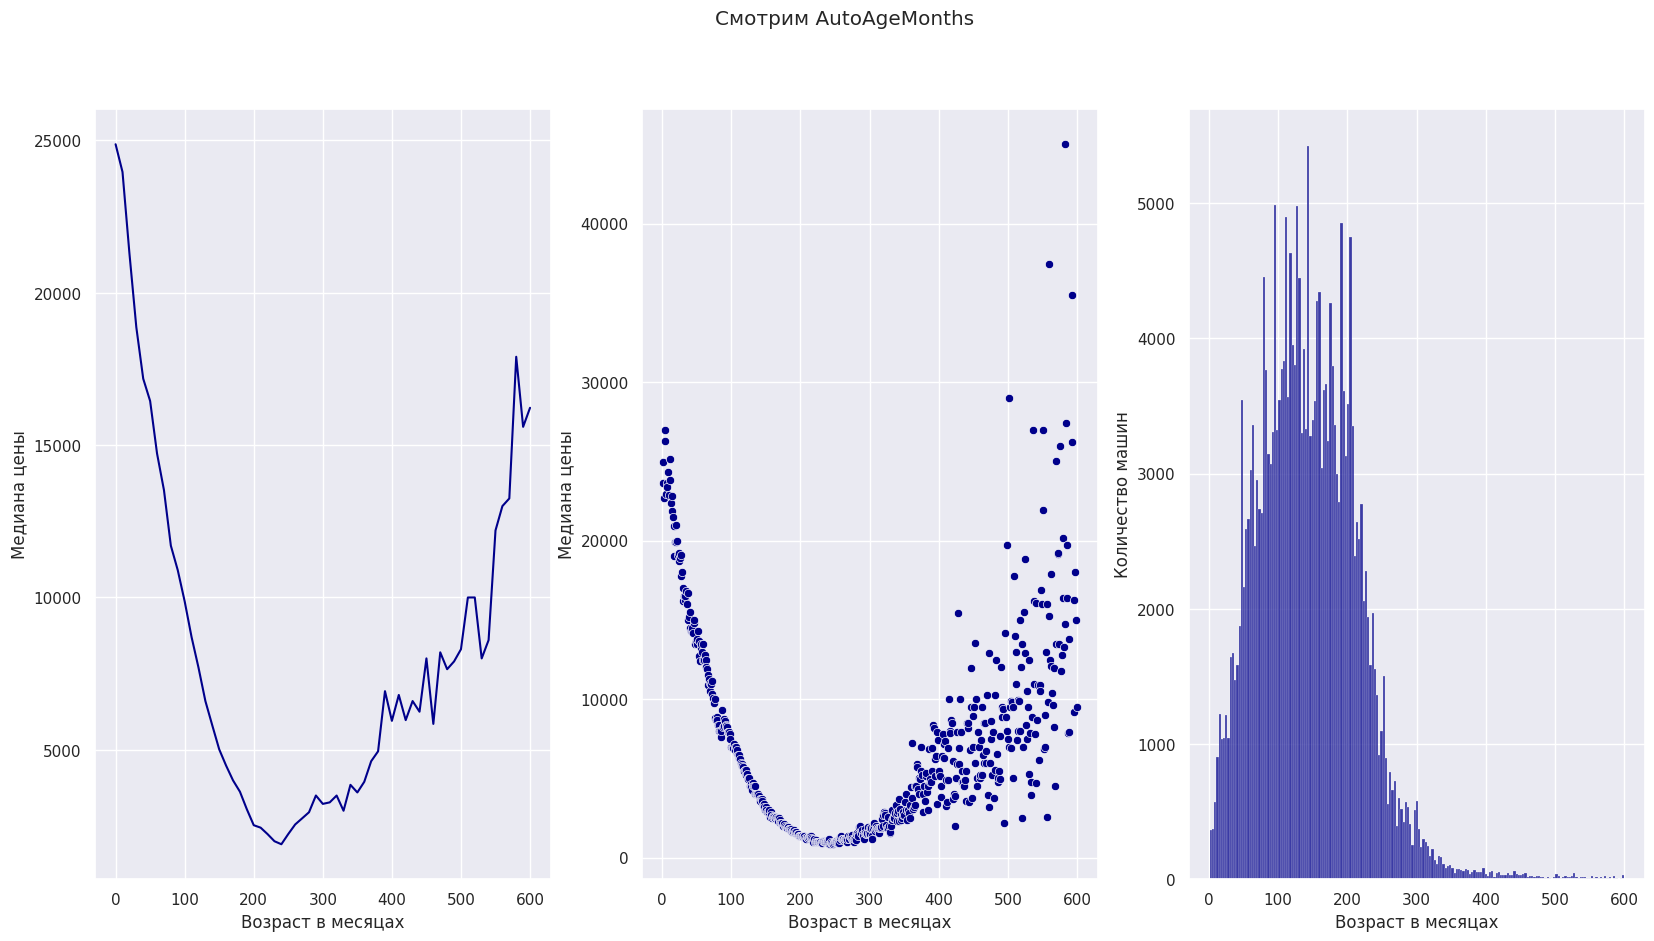

In [57]:
# Посмотрим, влияет ли возраст машины на цену. Я думаю, что да.

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

sns.lineplot(
    ax=axes[0],
    x=sorted(data_eda.autoAgeMonths.unique()),
    y=data_eda.groupby('autoAgeMonths').price.median(),
    color='darkblue'
)
axes[0].set_xlabel('Возраст в месяцах')
axes[0].set_ylabel('Медиана цены')

sns.scatterplot(
    ax=axes[1],
    x=sorted(data.autoAgeMonths.unique()),
    y=data.groupby('autoAgeMonths').price.median(),
    color='darkblue'
)
axes[1].set_xlabel('Возраст в месяцах')
axes[1].set_ylabel('Медиана цены')

sns.histplot(
    ax=axes[2],
    x=data.autoAgeMonths,
    color='darkblue'
)
axes[2].set_xlabel('Возраст в месяцах')
axes[2].set_ylabel('Количество машин')

fig.suptitle("Смотрим AutoAgeMonths")
plt.show()

In [58]:
# Теперь нужна цена с мощностью, тк кажется это важный параметр

data_eda = pd.DataFrame(data.value_counts(subset=['price', 'powerPS'])).reset_index()
data_eda.price = round(data_eda.price / 10000) * 10000
data_eda.powerPS = round(data_eda.powerPS / 10) * 10
data_eda = pd.DataFrame(data_eda.value_counts(subset=['price', 'powerPS'])).reset_index()

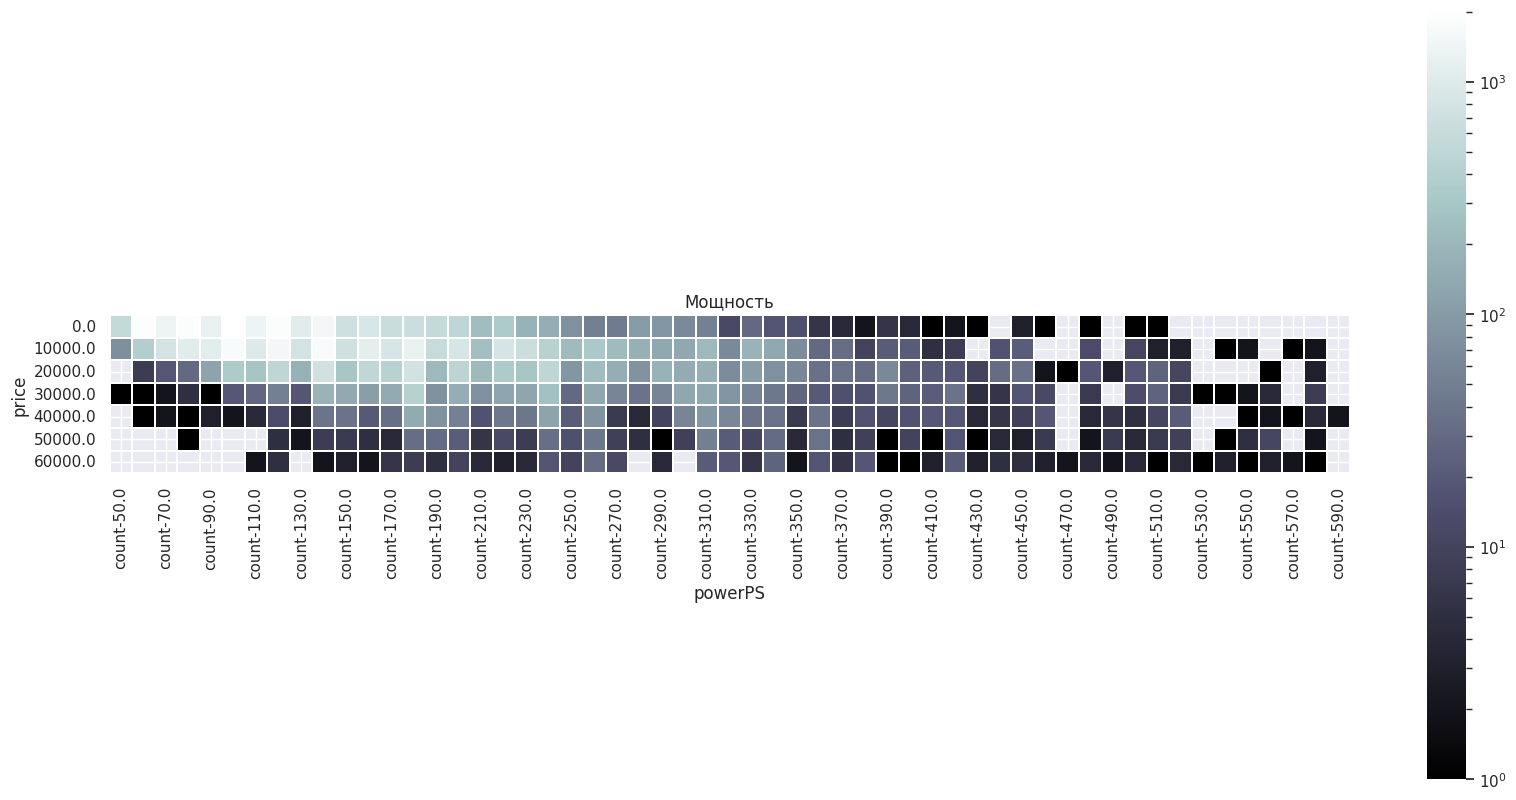

In [59]:
from matplotlib.colors import LogNorm

# fig , ax = plt.subplots(nrows = 3, ncols = 1, figsize=(20, 10))
# ax[0].set(xlabel='Мощность автомобиля', ylabel='Цена')
sns.heatmap(data_eda.pivot(index = 'price', columns = 'powerPS'),
            cmap = 'bone',
            square = True,
            linewidths = 0.1,
            xticklabels = 2,
            norm = LogNorm())

plt.rcParams['figure.figsize'] = 20, 10
plt.xlabel("powerPS")
plt.ylabel("price")
plt.title("Мощность")
plt.show()

In [60]:
data.notRepairedDamage = data.notRepairedDamage == 'ja'
data.gearbox = data.gearbox == 'automatik'
data = data[data.powerPS <= 500]

In [61]:
data.price = np.log1p(data.price)
x = data[categorical + numeric + other]
y = data['price']

x['bias'] = 1
other += ['bias']

<ipython-input-61-a16604523ceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price = np.log1p(data.price)


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [63]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=10)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [64]:
# YOUR CODE:
from descents import get_descent
from sklearn.metrics import mean_squared_error, r2_score
from linear_regression import LinearRegression
from math import inf

lambda_values = np.logspace(-2, 3, num=30)
descent_methods = ['full', 'stochastic', 'momentum', 'adam']
results_df = pd.DataFrame(index = lambda_values, columns = descent_methods)
results_df.index.name = 'lambda'

optimal_results = {}
optimal_models = {}

for method in descent_methods:
    min_val_error = inf
    for lam in lambda_values:
        config = {
            'descent_name': method,
            'kwargs': {
                'dimension': 308,
                'lambda_': lam
            }
        }

        model = LinearRegression(descent_config=config)
        model.fit(x_train, np.asarray(y_train))

        validation_error = np.sqrt(model.calc_loss(x_valid, y_valid))
        results_df.at[lam, method] = validation_error

        if validation_error < min_val_error:
            best_model = model
            min_val_error = validation_error
            best_lambda = lam

    train_error = np.sqrt(best_model.calc_loss(x_train, y_train))
    test_error = np.sqrt(best_model.calc_loss(x_test, y_test))
    test_predictions = best_model.predict(x_test)
    r2_test_score = r2_score(y_test, test_predictions)
    train_predictions = best_model.predict(x_train)
    r2_train_score = r2_score(y_train, train_predictions)

    optimal_results[method] = [
        train_error, test_error, min_val_error, best_lambda,
        best_model.descent.lr.iteration, r2_train_score, r2_test_score
    ]
    optimal_models[method] = best_model

    print(f"Лучшие результаты: {method}:")
    print(f"Оптимальное значение λ: {best_lambda}")
    print(f"Ошибка на обучении: {train_error}")
    print(f"Ошибка на валидации: {min_val_error}")
    print(f"Ошибка на тесте: {test_error}")
    print(f"Число итераций: {best_model.descent.lr.iteration}")
    print(f"R2: на обучении {r2_train_score}, на тесте {r2_test_score}")
    print("-" * 2)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:90: RuntimeWarning: overflow encountered in square
  return np.mean(residuals ** 2)
/content/descents.py:123: RuntimeWarning: overflow encountered in multiply
  weight_diff = -self.lr() * gradient
/content/descents.py:124: RuntimeWarning: invalid value encountered in add
  self.w += weight_diff


Лучшие результаты: full:
Оптимальное значение λ: 2.592943797404667
Ошибка на обучении: 0.6179421197237732
Ошибка на валидации: 0.6125445623597938
Ошибка на тесте: 0.6310154270288588
Число итераций: 66
R2: на обучении 0.7092683016342756, на тесте 0.6977080451079389
--


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:90: RuntimeWarning: overflow encountered in square
  return np.mean(residuals ** 2)
/content/descents.py:123: RuntimeWarning: overflow encountered in multiply
  weight_diff = -self.lr() * gradient
/content/descents.py:124: RuntimeWarning: invalid value encountered in add
  self.w += weight_diff


Лучшие результаты: stochastic:
Оптимальное значение λ: 0.7880462815669912
Ошибка на обучении: 0.6328107338357704
Ошибка на валидации: 0.6309126380550044
Ошибка на тесте: 0.6460049830471419
Число итераций: 300
R2: на обучении 0.6951090995103646, на тесте 0.6831757823030729
--


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:90: RuntimeWarning: overflow encountered in square
  return np.mean(residuals ** 2)
/content/descents.py:180: RuntimeWarning: overflow encountered in multiply
  self.h = self.alpha * self.h - self.lr() * gradient
/content/descents.py:180: RuntimeWarning: invalid value encountered in subtract
  self.h = self.alpha * self.h - self.lr() * gradient


Лучшие результаты: momentum:
Оптимальное значение λ: 1.743328822199989
Ошибка на обучении: 0.5773943727412776
Ошибка на валидации: 0.5736320109997285
Ошибка на тесте: 0.5951910152650374
Число итераций: 136
R2: на обучении 0.7461706237017427, на тесте 0.7310575427794199
--
Лучшие результаты: adam:
Оптимальное значение λ: 3.856620421163472
Ошибка на обучении: 0.5676948814999029
Ошибка на валидации: 0.56430771921258
Ошибка на тесте: 0.587314048080928
Число итераций: 171
R2: на обучении 0.7546270152427886, на тесте 0.7381289961241071
--


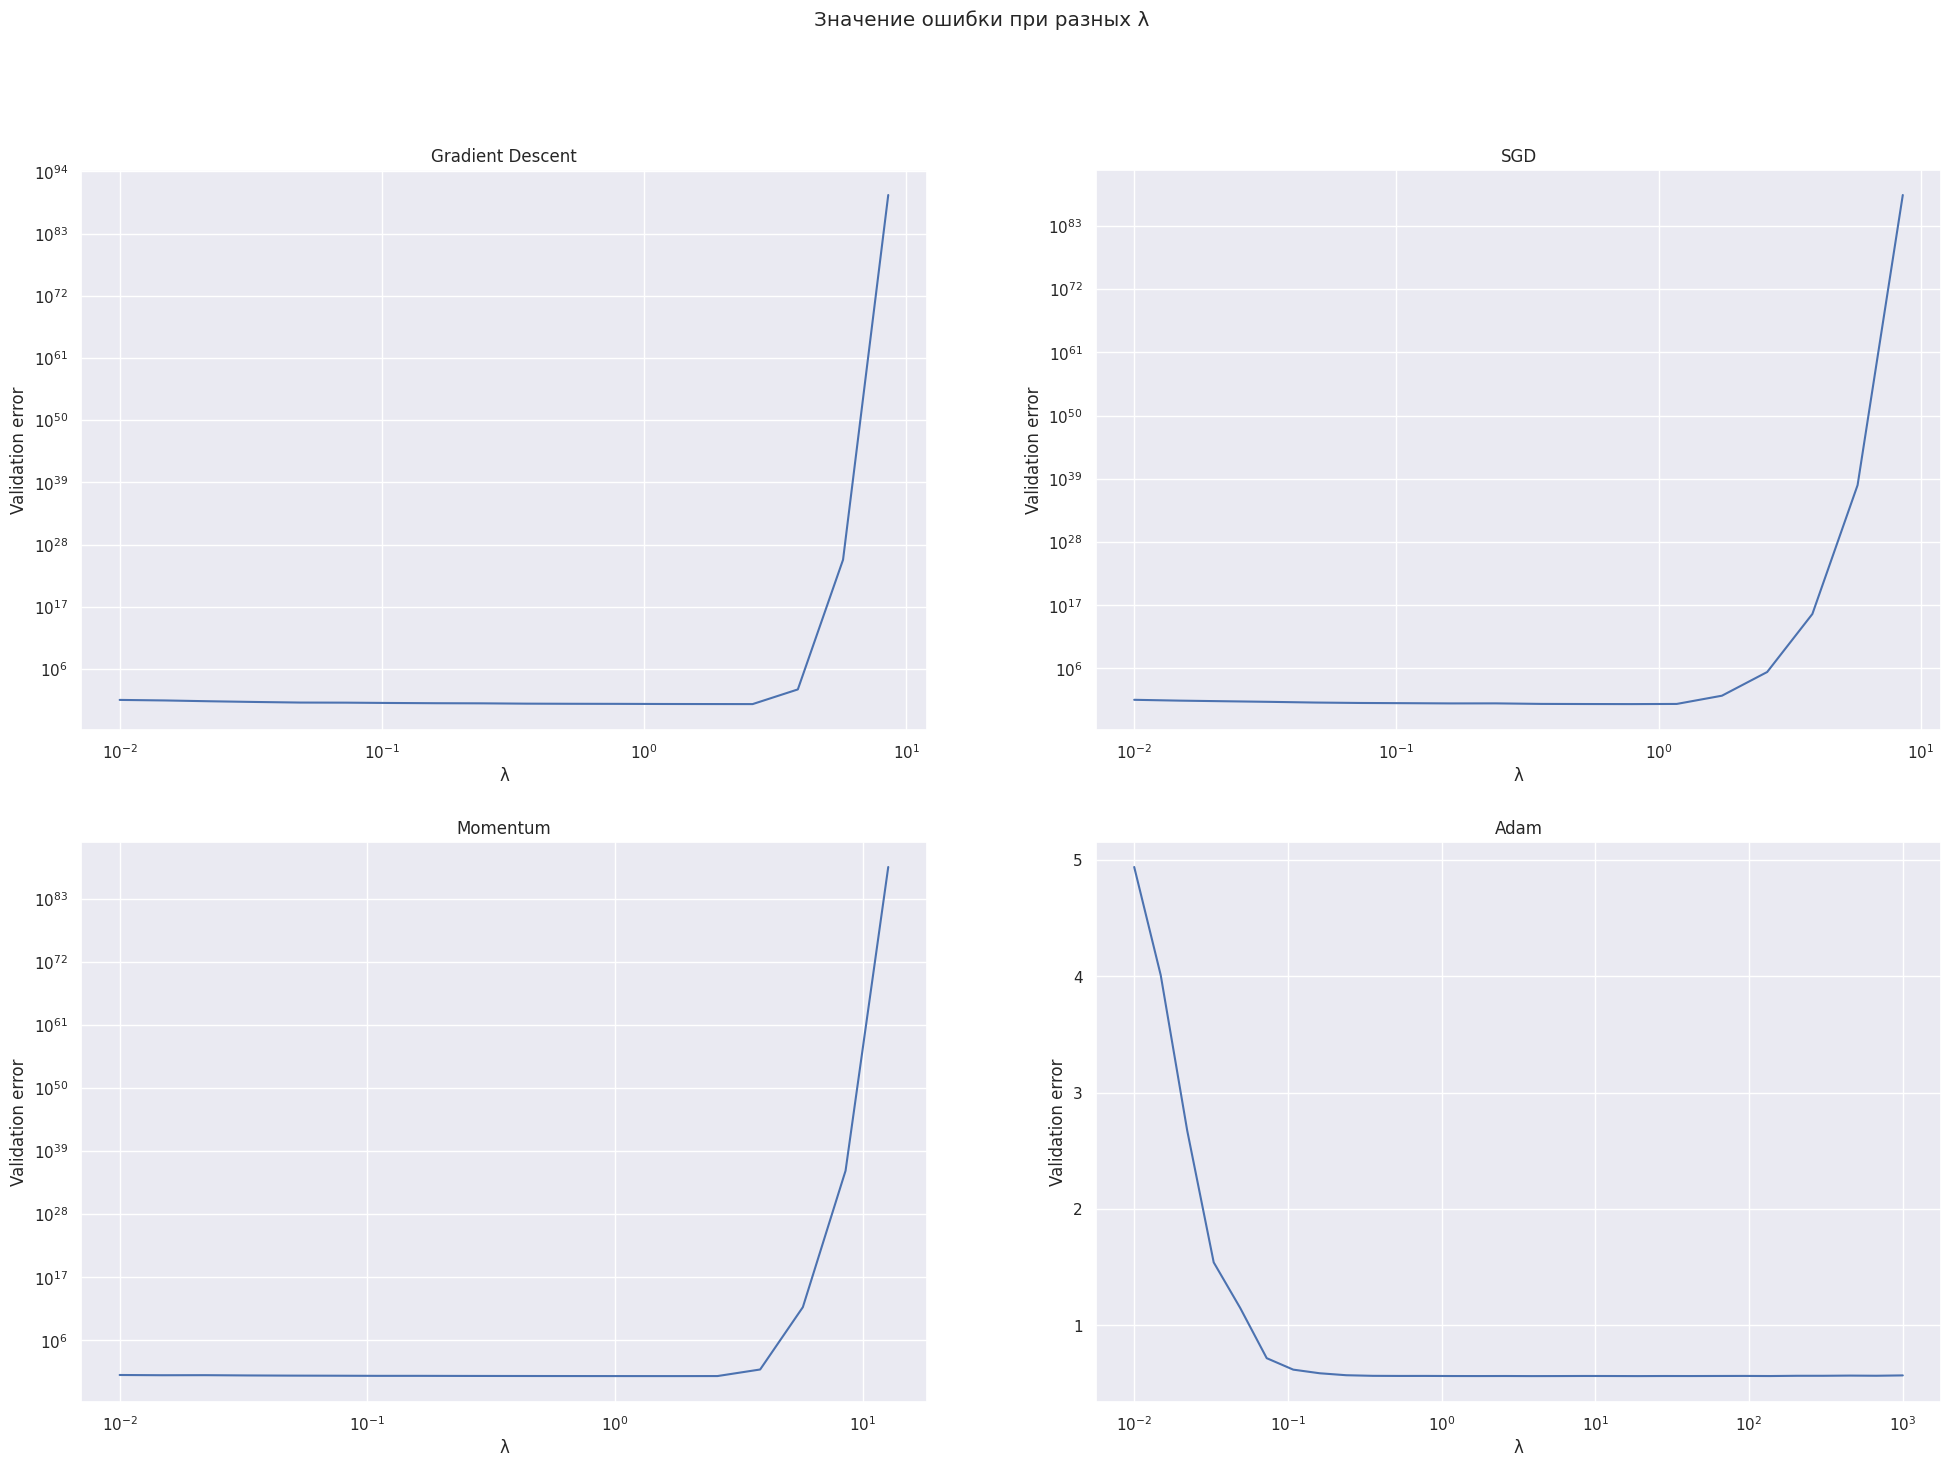

In [65]:
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(24, 16))
fig.suptitle('Значение ошибки при разных λ')
ax[0][0].plot(results_df.index, results_df.full)
ax[0][0].set_xscale("log")
ax[0][0].set_yscale("log")
ax[0][0].set_xlabel("λ")
ax[0][0].set_ylabel("Validation error")
ax[0][0].set_title("Gradient Descent")
ax[0][1].plot(results_df.index, results_df.stochastic)
ax[0][1].set_xscale("log")
ax[0][1].set_yscale("log")
ax[0][1].set_xlabel("λ")
ax[0][1].set_ylabel("Validation error")
ax[0][1].set_title("SGD")
ax[1][0].plot(results_df.index, results_df.momentum)
ax[1][0].set_xscale("log")
ax[1][0].set_yscale("log")
ax[1][0].set_xlabel("λ")
ax[1][0].set_ylabel("Validation error")
ax[1][0].set_title("Momentum")
ax[1][1].plot(results_df.index, results_df.adam)
ax[1][1].set_xscale("log")
ax[1][1].set_xlabel("λ")
ax[1][1].set_ylabel("Validation error")
ax[1][1].set_title("Adam")
plt.show()

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

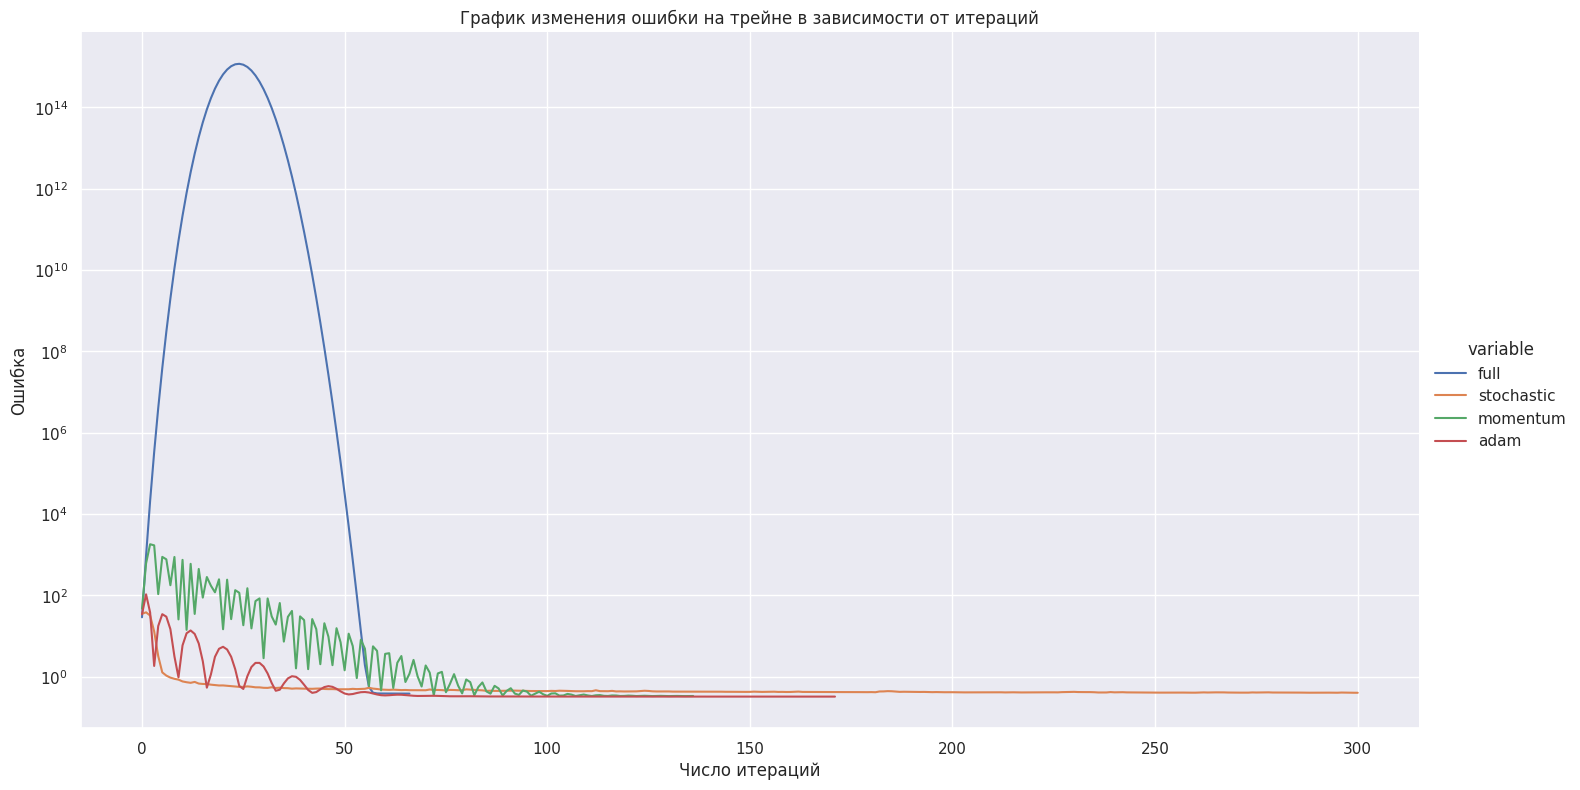

In [66]:
error_df = pd.DataFrame(columns = ['iteration', 'full', 'stochastic', 'momentum', 'adam'])
error_df['iteration'] = np.arange(301)

for method in descent_methods:
    method_errors = optimal_models[method].loss_history
    error_df[method] = method_errors + [np.nan] * (301 - len(method_errors))

error_df_long = error_df.melt(id_vars = ['iteration'], value_vars = ['full', 'stochastic', 'momentum', 'adam'])
error_df_long.dropna(subset = ['value'], inplace=True)

plot = sns.relplot(
    data = error_df_long,
    x = 'iteration',
    y = 'value',
    hue = 'variable',
    kind = 'line',
    height = 8,
    aspect = 1.8
)

plot.set(
    yscale = "log",
    title = "График изменения ошибки на трейне в зависимости от итераций",
    xlabel = "Число итераций",
    ylabel = "Ошибка"
)

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

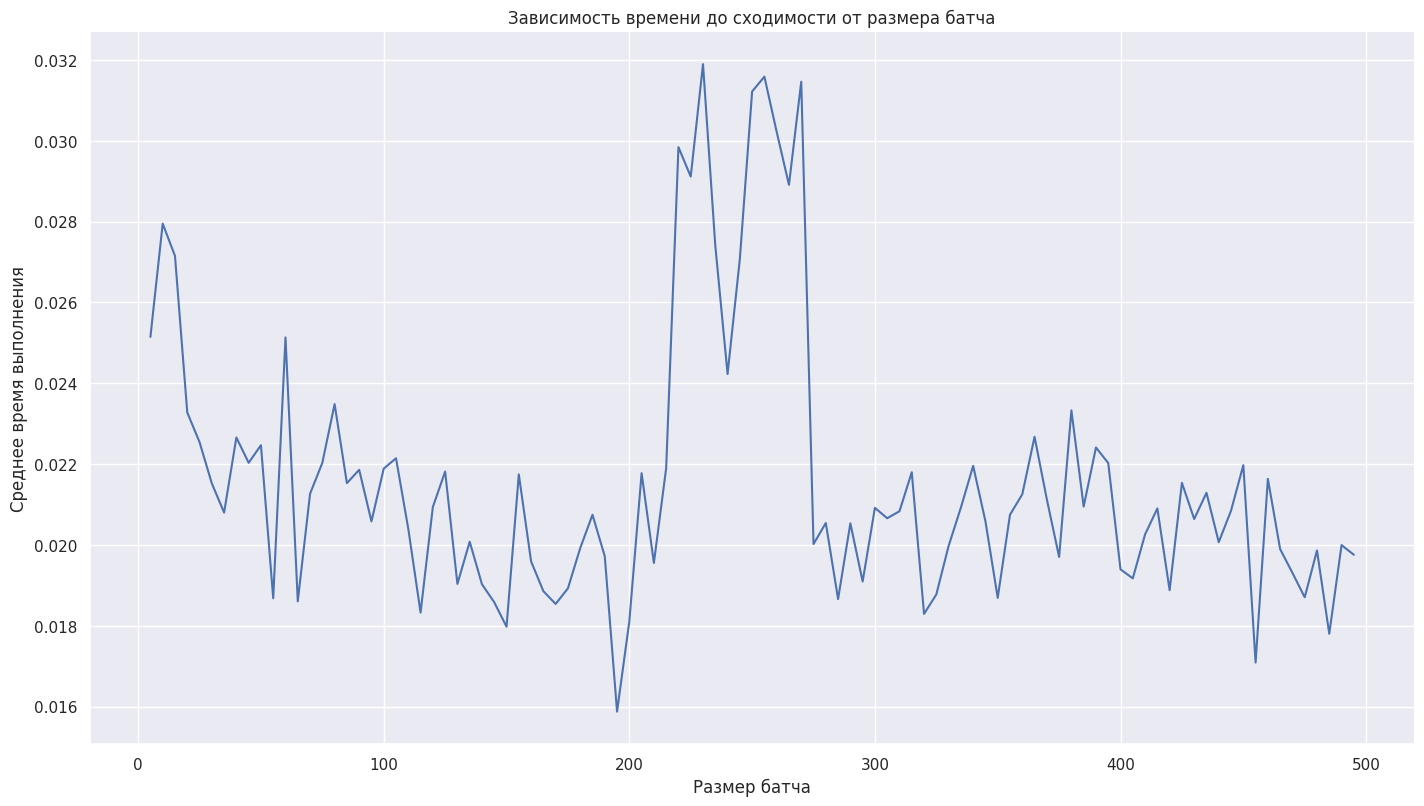

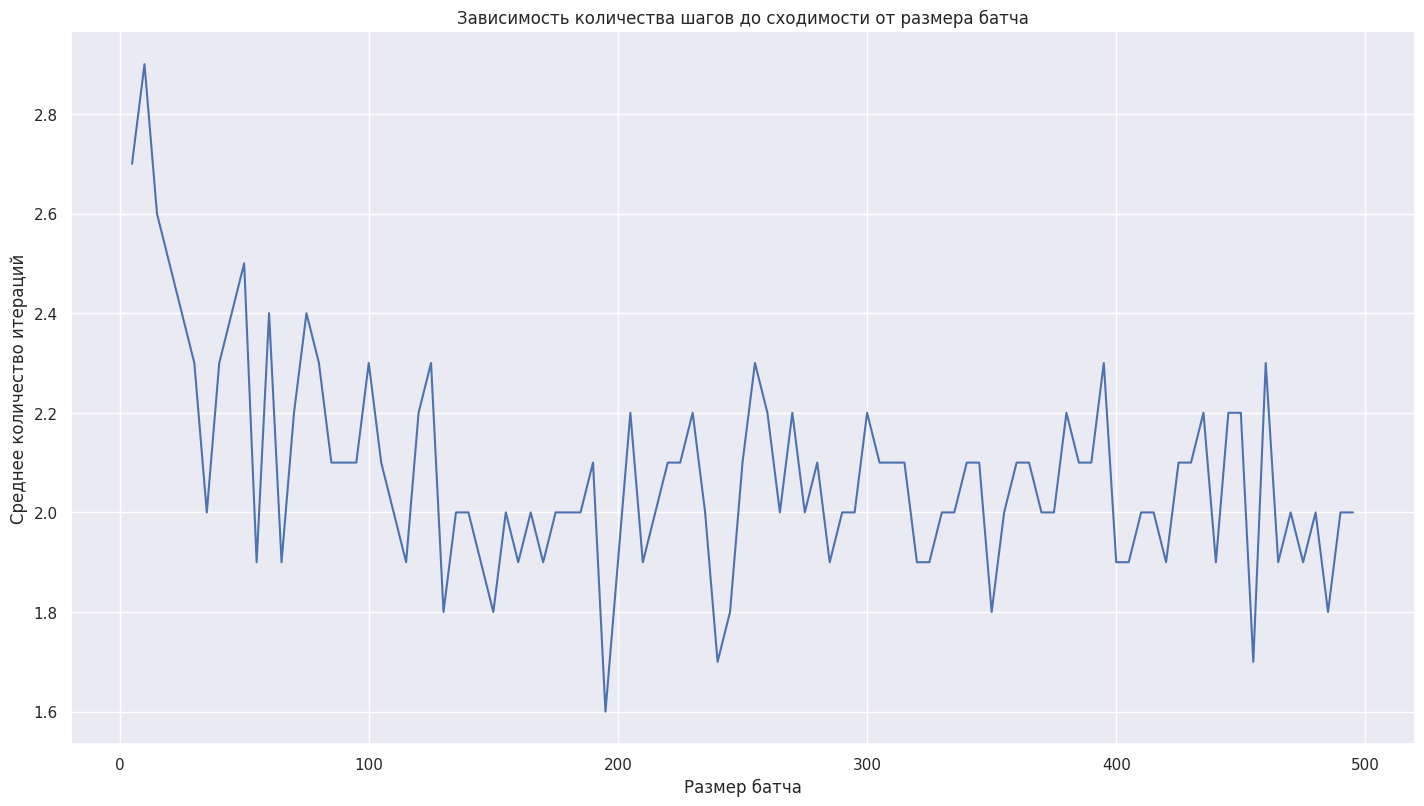

In [67]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:
import time

batch_data = pd.DataFrame(columns = ['batch', 'avg_iters', 'avg_time'])
batch_data['batch'] = np.arange(5, 500, 5)
batch_data.set_index('batch', inplace = True)

total_time = 0
total_iterations = 0

for batch_size in batch_data.index:
    for _ in range(10):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': 308,
                'batch_size': batch_size
            }
        }
        model = LinearRegression(descent_config = descent_config)
        start_time = time.time()
        model.fit(x_train, np.asarray(y_train))
        total_time += time.time() - start_time
        total_iterations += model.descent.lr.iteration

    batch_data.at[batch_size, 'avg_iters'] = total_iterations / 10
    batch_data.at[batch_size, 'avg_time'] = total_time / 10
    total_iterations, total_time = 0, 0

plot1 = sns.relplot(kind = 'line', data = batch_data, x = 'batch', y = 'avg_time', height = 8)
plot1.set(
    xlabel = "Размер батча",
    ylabel = "Среднее время выполнения",
    title = "Зависимость времени до сходимости от размера батча"
)

plot2 = sns.relplot(kind = 'line', data = batch_data, x = 'batch', y = 'avg_iters', height = 8)
plot2.set(
    xlabel = "Размер батча",
    ylabel = "Среднее количество итераций",
    title = "Зависимость количества шагов до сходимости от размера батча"
)

plt.show()

**Мои выводы:**

В общем графики ведут себя схоже. Первый график колеблется около 0.020, второй около 2.1 (без учета крупных колебаний). После того, как мы достигаем этой асимптоты, еще увеличивать размер батча не имеет смысла, тк кол-во итераций уже не снижается.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124783002/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [69]:
lambda_values = np.logspace(-2, 3, num=25)
regularization_factors = np.logspace(-3, -2, num=5)
descent_methods = ['full', 'stochastic', 'momentum', 'adam']

optimal_results = {}
optimal_models = {}

for method in descent_methods:
    lowest_error = inf
    for reg_factor in regularization_factors:
        for lam in lambda_values:
            config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {
                    'dimension': 308,
                    'lambda_': lam,
                    'mu': reg_factor
                }
            }
            model = LinearRegression(descent_config=config)
            model.fit(x_train, np.asarray(y_train))
            validation_error = np.sqrt(model.calc_loss(x_valid, y_valid))

            if validation_error < lowest_error:
                best_model = model
                lowest_error = validation_error
                optimal_lambda = lam
                optimal_mu = reg_factor

    test_error = np.sqrt(best_model.calc_loss(x_test, y_test))
    train_error = np.sqrt(best_model.calc_loss(x_train, y_train))
    predicted_train = best_model.predict(x_train)
    r2_score_train = r2_score(y_train, predicted_train)
    predicted_test = best_model.predict(x_test)
    r2_score_test = r2_score(y_test, predicted_test)

    results_summary = [
        train_error,
        test_error,
        lowest_error,
        optimal_lambda,
        best_model.descent.lr.iteration,
        r2_score_train,
        r2_score_test
    ]

    print(f"Оптимальные результаты для метода {method}:")
    print(f"Коэф регуляризации: {optimal_mu}")
    print(f"Оптимальное значение лямбды: {optimal_lambda}")
    print(f"Ошибка на трейне: {train_error}")
    print(f"Ошибка на валидации: {lowest_error}")
    print(f"Ошибка на тесте: {test_error}")
    print(f"Количество итераций: {best_model.descent.lr.iteration}")
    print(f"R2 на трейне: {r2_score_train}, на тесте: {r2_score_test}")
    print("--")

    optimal_results[method] = results_summary
    optimal_models[method] = best_model

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:90: RuntimeWarning: overflow encountered in square
  return np.mean(residuals ** 2)
/content/descents.py:123: RuntimeWarning: overflow encountered in multiply
  weight_diff = -self.lr() * gradient


Оптимальные результаты для метода full:
Коэф регуляризации: 0.0017782794100389228
Оптимальное значение лямбды: 3.1622776601683795
Ошибка на трейне: 0.620920519121621
Ошибка на валидации: 0.6155438140513458
Ошибка на тесте: 0.6328248068119356
Количество итераций: 265
R2 на трейне: 0.7064589708381237, на тесте: 0.6959719698587856
--


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:90: RuntimeWarning: overflow encountered in square
  return np.mean(residuals ** 2)
/content/descents.py:123: RuntimeWarning: overflow encountered in multiply
  weight_diff = -self.lr() * gradient
/content/descents.py:124: RuntimeWarning: invalid value encountered in add
  self.w += weight_diff


Оптимальные результаты для метода stochastic:
Коэф регуляризации: 0.001
Оптимальное значение лямбды: 1.2115276586285888
Ошибка на трейне: 0.6715158259765395
Ошибка на валидации: 0.6678782420544301
Ошибка на тесте: 0.6778370791374625
Количество итераций: 300
R2 на трейне: 0.6566719447579383, на тесте: 0.6511832919220963
--


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:90: RuntimeWarning: overflow encountered in square
  return np.mean(residuals ** 2)
/content/descents.py:180: RuntimeWarning: overflow encountered in multiply
  self.h = self.alpha * self.h - self.lr() * gradient


Оптимальные результаты для метода momentum:
Коэф регуляризации: 0.001
Оптимальное значение лямбды: 3.1622776601683795
Ошибка на трейне: 0.5810947332510888
Ошибка на валидации: 0.5759850215099456
Ошибка на тесте: 0.5969631321390754
Количество итераций: 300
R2 на трейне: 0.7429067542429388, на тесте: 0.7294536644847248
--
Оптимальные результаты для метода adam:
Коэф регуляризации: 0.001
Оптимальное значение лямбды: 5.10896977450693
Ошибка на трейне: 0.5780706269107526
Ошибка на валидации: 0.5733448542030448
Ошибка на тесте: 0.5946632320994817
Количество итераций: 300
R2 на трейне: 0.745575696893541, на тесте: 0.731534298523268
--


## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Важно! Это блюдо соответствует всем сезонам и настроениям.

**Рецепт:**

1. Взять хороший рибайчик и оставить его лежать в пищевой пленке часика на 2, чтобы дошел до комнатной температуры
2. Обтереть маслом, поперчить, не солить! потом посолим
3. Обжарить на сильном огне с растопленным маслом, стручком красного перца, раздавленным чесноком, тимьяном и розмарином по 2 минуты с каждой стороны
4. Плотно замотать в фольгу и запечь в течение 10 мин при температуре 180 градусов
5. Достать из духовки и оставить его потусить в фольге еще минут на 10
6. Посолить, добавить соус по вкусу (брусничный - класс), наслаждаться.

У меня получилось вот так:

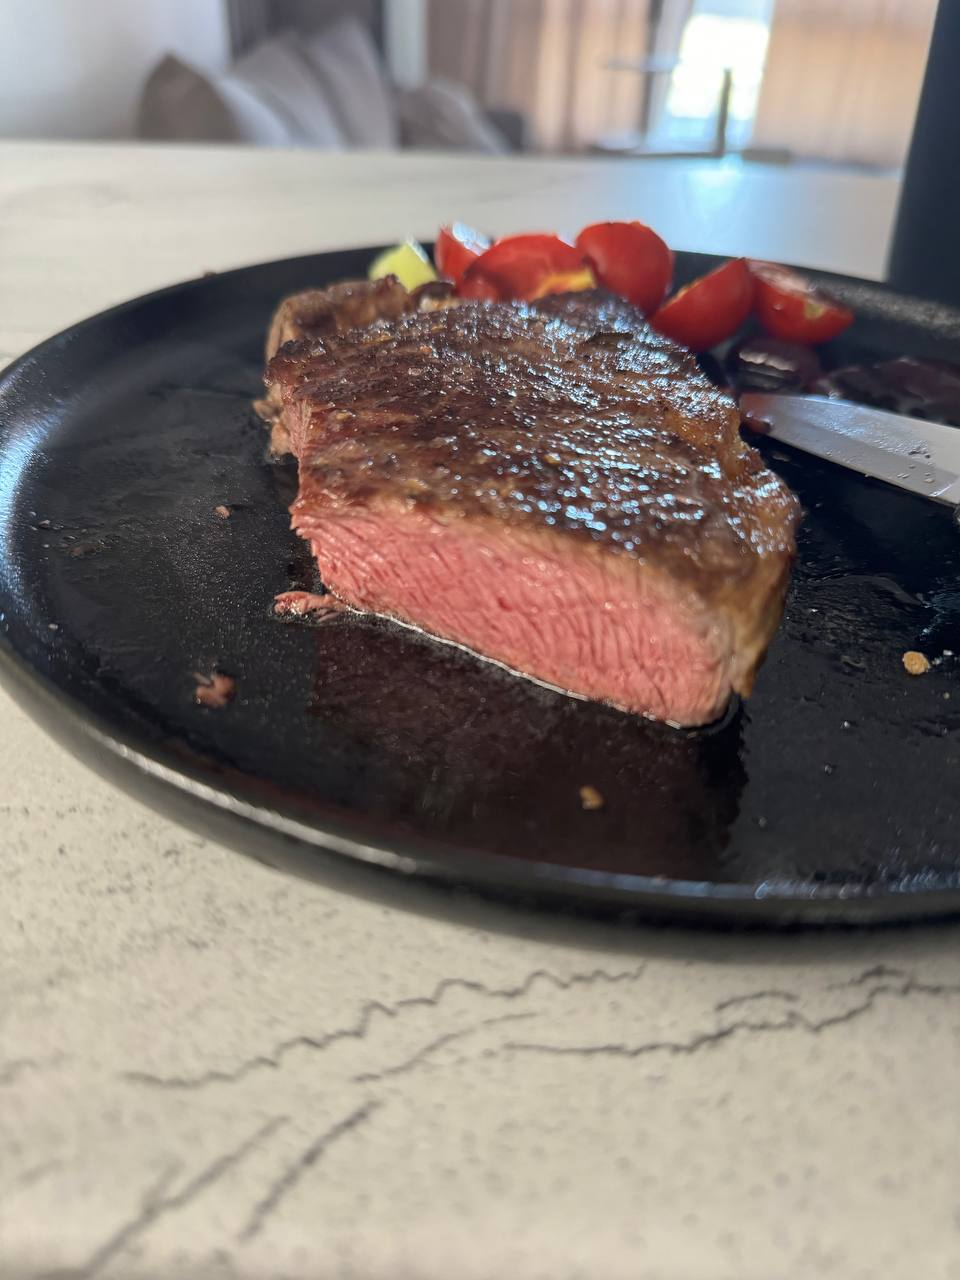

А это мой довольный сытый папа

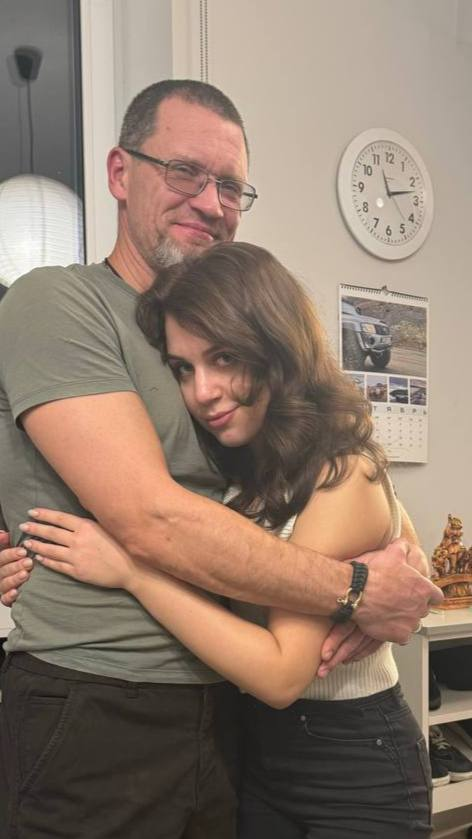

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: